In [31]:
!pip install torchdiffeq systems


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from torchdiffeq import odeint
from scipy.integrate import solve_ivp
from sklearn.preprocessing import StandardScaler

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from systems.lotka_volterra import simulate as simulate_lv
from systems.lorenz import simulate as simulate_lorenz
from utils.compute_rsme import compute_rmse_over_time

In [33]:
# Open the RSME data files
def load_rmse_data(file_path):
    data = np.load(file_path, allow_pickle=True)
    rmse = data['rmse']
    t = data['t']
    label = data['label'].item()
    return t, rmse, label

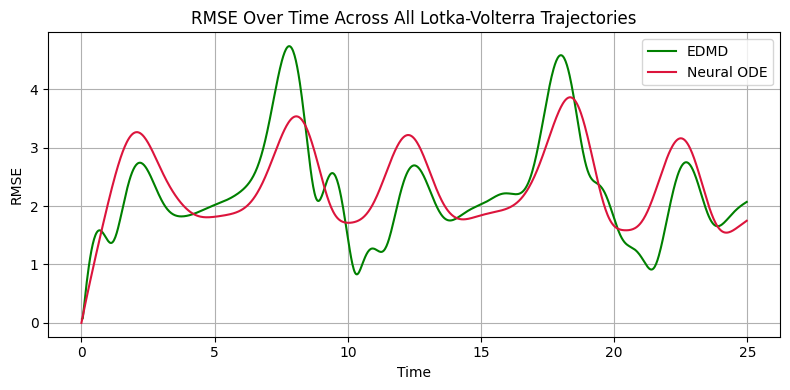

In [39]:
SYSTEM = "lotka_volterra"
pretty = {
    "lorenz": "Lorenz",
    "lotka_volterra": "Lotka-Volterra"
}

t_neural, rmse_neural, label_neural = load_rmse_data(f"data/{SYSTEM}_neural_rmse.npz")

t_edmd, rmse_edmd, label_edmd = load_rmse_data(f"data/{SYSTEM}_edmd_rmse.npz")

# Plot both
plt.figure(figsize=(8, 4))
plt.plot(t_edmd, rmse_edmd, label="EDMD", color='green')
plt.plot(t_neural, rmse_neural, label=label_neural, color='crimson')
plt.xlabel("Time")
plt.ylabel("RMSE")
plt.title(f"RMSE Over Time Across All {pretty[SYSTEM]} Trajectories")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


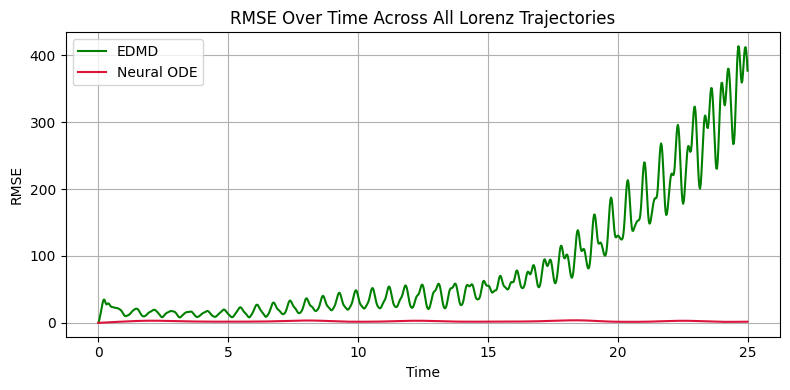

In [40]:
SYSTEM = "lorenz"
pretty = {
    "lorenz": "Lorenz",
    "lotka_volterra": "Lotka-Volterra"
}

t_neural, rmse_neural, label_neural = load_rmse_data(f"data/{SYSTEM}_neural_rmse.npz")

t_edmd, rmse_edmd, label_edmd = load_rmse_data(f"data/{SYSTEM}_edmd_rmse.npz")

# Plot both
plt.figure(figsize=(8, 4))
plt.plot(t_edmd, rmse_edmd, label="EDMD", color='green')
plt.plot(t_neural, rmse_neural, label=label_neural, color='crimson')
plt.xlabel("Time")
plt.ylabel("RMSE")
plt.title(f"RMSE Over Time Across All {pretty[SYSTEM]} Trajectories")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()